## CMAC Assignment


**Преподаватель:** Силаев Юрий Владимирович

**Студент:** Волков Андрей Андреевич, ББИ 174

## Оглавление

- [Проблема восстановления пропущенных данных](#problem)
- [Определение CMAC, области применения](#definition)
- [Нейpосетевой подход к pешению задачи заполнения пpопусков](#neural)
- [Разработка алгоритма для заполнения пропусков](#development)
- [Реализация CMAC в библиотеке neupy](#neupy)
- [Анализ таблицы метеорологических данных Австралии](#analysis)
- [Источники](#)

<div id='problem'/>

## Проблема восстановления пропущенных данных

Проблема обнаружения и восстановления пропущенных числовых данных встречается во многих прикладных задачах. Существует множество причин возникновения пропусков в обрабатываемых данных, среди которых выход из строя регистрирующей аппаратуры, плохие условия наблюдений, например, сильная облачность или туман, простая потеря части данных.

Чаще всего эта задача возникает при обработке одномерных процессов, заданных строкой данных, и при обработке двумерных процессов, представляющих, например, изображения фрагментов местности, заданных в виде таблицы данных. К таким задачам относят, в первую очередь, задачи обработки метеорологических наблюдений и спутниковой схемки местности. 

<div id='definition'/>

## Определение CMAC, области применения

**CMAC** (Cerebellar model articulation controller) - нейронная сеть, в осонову которой положена нейрофизиологическая модель мозжечка для управления роботом-манипулятором.

Основное назначение нейронных сетей — запоминание и воспроизведение функций многих переменных. Наиболее существенными отличиями **НС СМАС** от других нейронных сетей являются следующие:

- аргументы запоминаемой и воспроизводимой функций принимают только дискретные значения
- нелинейное преобразование аргументов функции происходит неявно с помощью алгоритма вычисления адресов ячеек ассоциативной памяти, в которых хранятся числа, определяющие значение функции

В **НС СМАС** каждый входной N-мерный сигнал $х$ (аргумент функции) возбуждает, или делает активными, ровно $\rho$ ячеек памяти, суммарное содержимое которых равно значению запоминаемой функции. Каждому входному N-мерному вектору $х$ однозначно соответствует $\rho$-мерный вектор активных номеров ячеек памяти $m$. Параметр $\rho$ (обобщающий параметр) играет очень важную роль, его значение определяет разрешающую способность **НС СМАС** и требуемый объем памяти нейронной сети.

Алгоритм вычисления номеров активных ячеек памяти устроен так, что чем ближе друг к другу расположены входные вектора, тем больше у них общих ячеек памяти — именно это и придает **НС СМАС** интерполяционные свойства.

Сегодня CMAC применяется для решения задач восстановления пропущенных данных в метеорологии, в двумерных изображениях, в звуковых файлах.

<div id='neural'/>

## Нейpосетевой подход к pешению задачи заполнения пpопусков

Эта задача относится к задаче оценивания функции $у$ в точке $х$ по ее значениям, заданным в соседних точках, а именно к задаче интерполяции, либо экстраполяции двумерных данных в случае с таблицами и одномерных данных в случае с рядами.

Следует различать два основных подхода к решению задачи заполнения таблиц и рядов с пропусками: подходы, основанные на локальной и глобальной интерполяции или экстраполяции. 

В первом подходе строится аппроксимирующая функция по значениям функции $у(x)$, которые лежат в окрестности пропущенной точки, и значение аппроксимирующей функции в пропущенной точке принимается за пропущенное значение. 

Второй подход основан на нахождении аппроксимирующей функции для всей таблицы или всего ряда по непропущенным значениям и вычислении пропущенных значений функции по значениям аппроксимирующей функции в пропущенных точках. 

Большое число методов заполнения пропусков в таблицах и строках порождено большим числом существующих методов аппроксимации функций, которые, в свою очередь, порождены видом аппроксимирующих функций (степенные, тригонометрические, специально подобранные) и функционалом приближения аппроксимируемой и аппроксимирующей функций.

В качестве аппроксимирующих функций, как отмечалось выше, могут быть использованы и обучаемые искусственные нейронные сети. Основной алгоритм заполнения пропусков в таблицах и строках с помощью нейронных сетей состоит из следующих шагов.

**Шаг 1.** Анализ таблицы или строки в целях принятия решения о локальном или глобальном подходе к задаче заполнения пропущенных данных.

**Шаг 2.** Анализ таблицы или строки в целях автоматического выделения координат пропущенных и непропущенных данных.

**Шаг 3.** Формирование обучающей выборки для нейронной сети из непропущенных данных и соответствующих им значений из таблицы или строки. Формирование множества координат пропущенных данных.

**Шаг 4.** Обучение нейронной сети с помощью части множества непропущенных данных, в котором удалена первая точка непропущенных данных. Вычисление оценки непропущенного значения с помощью обученной нейронной сети абсолютного значения относительной ошибки оценки.

**Шаг 5.** Повторение шага 4 при последовательном удалении либо всех, либо части непропущенных данных с вычислением оценок удаленных данных и абсолютных значений относительных ошибок их оценивания. Вычисление усредненной ошибки заполнения пропусков в таблице или строке по вычисленным абсолютным значениям относительных ошибок.

**Шаг 6.** Если оценка ошибки заполнения пропусков удовлетворяет требованиям точности заполнения, то провести обучение на всем множестве непропущенных данных и вычислить оценки пропущенных данных последовательной подачей на вход обученной нейронной сети координат пропущенных данных и заполнить пропуски вычисленными данными.

**Шаг 7.** Если оценка заполнения пропусков не удовлетворяет требованиям точности заполнения, то перейти к другой конфигурации нейронной сети и для нее повторить вычисления шагов 4—6, определив для новой конфигурации точность заполнения.

**Шаг 8.** Шаг 7 повторять до тех пор, пока либо будет достигнута требуемая точность заполнения пропусков, либо будет выбран вариант конфигурации сети с минимально достигнутым абсолютным значением относительной ошибки заполнения из всех исследованных вариантов.

**Шаг 9.** После выбора оптимального варианта конфигурации сети провести ее обучение на всем множестве непропущенных данных оценить значения пропущенных данных и внести их в таблицу.

<div id='development'/>

## Разработка алгоритма для заполнения пропусков

- Подготовить набор данных, обучающую и тестовые выборки
- Обучение нейронной сети, подбор весов
- Построение графиков аппроксимации и тестовой выборки

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

### Подготовить набор данных, обучающую и тестовые выборки

В качестве набора данных используем график функции $y = sin(x), x \in [0; 2 \pi]$

In [2]:
min_range, max_range = 0, 2 * math.pi
dataset_range = max_range - min_range

dataset = np.linspace(min_range, max_range, 100)
dataset = [round(i, 2) for i in list(dataset)]

Напишем отдельную лямбду для преобразования массива аргументов в список значений функции $sin(x)$.

In [3]:
map_sin = lambda data : [round(math.sin(item), 2) for item in data]

Из изначального набора данных выделим обучающую и тестовую выборку по следующему принципу.

`тестовая выборка (test)` - каждый третий элемент (33% от общего набора данных)

`обучающая выборка (train)` - все элементы, не вошедшие в тестовую выборку (66% от общего набора данных)

In [4]:
def split_train_test(dataset):
    test = [round(dataset[i], 2) for i in range(0, len(dataset), 3)]
    train = [round(item, 2) for item in dataset if item not in test]
    
    return (train, test)

Определим обучающие и тестовые выборки для нейронной сети, как для аргументов (x), так и для значений функции (y).

In [5]:
train_x, test_x = split_train_test(dataset)
train_y, test_y = map_sin(train_x), map_sin(test_x)

Text(0.5, 1.0, 'Обучающая выборка')

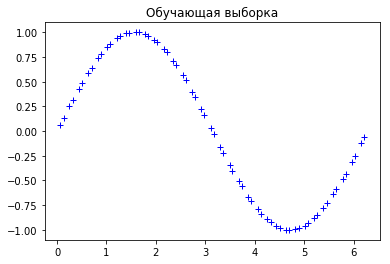

In [6]:
plt.plot(train_x, train_y, 'b+')
plt.title('Обучающая выборка')

Text(0.5, 1.0, 'Тестовая выборка')

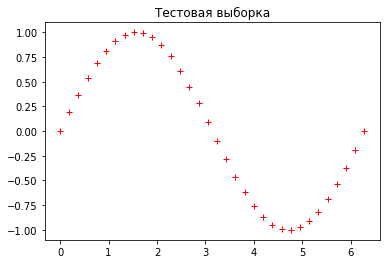

In [7]:
plt.plot(test_x, test_y, 'r+')
plt.title('Тестовая выборка')

Нормализируем обучающую и тестовую выборки на размер набора данных - `dataset_range` - для упрощения рассчетов. 

In [8]:
norm_data = lambda data : [item / dataset_range for item in data]

train_x, test_x = norm_data(train_x), norm_data(test_x)

### Обучение нейронной сети, подбор весов

In [9]:
# кол-во весов
weights_num = 50
# изначально все веса равны 1
weights = np.ones(weights_num)

In [10]:
# общая ошибка, изначально установлено заведомо большое значение 
total_error = 1000
# допустимое значение ошибки по модулю
convergence_error = 0.01
# фактор обобщения
generalization_factor = 5
# скорость обучения
learning_rate = 0.03

Алгоритм проходится по каждому элементу в обучающей выборке и присваивает соответствующие веса для каждого входного сигнала, в зависимости от его значения и фактора обобщения (generalization_factor).

Для упрощения, были вынесены отдельные функции для получения ассоциативных весов, верхних и нижних границ.

In [11]:
def get_lower_limit(central_weight, generalization_factor):
    result = central_weight - int(generalization_factor / 2) 
    return result if result >= 0 else 0

In [12]:
def get_upper_limit(central_weight, generalization_factor, plus_number=0):
    result = central_weight + int(generalization_factor / 2) + plus_number
    return result if result <= weights_num else weights_num

In [13]:
def get_associate_weights(generalization_factor, central_weight):
    if generalization_factor % 2 != 0 and generalization_factor != 1:
        lower_lim = get_lower_limit(central_weight, generalization_factor)
        upper_lim = get_upper_limit(central_weight, generalization_factor, plus_number=1)
        return [k for k in range(int(lower_lim), int(upper_lim))]
    
    elif generalization_factor == 1:
        return [central_weight]
            
    else:
        lower_lim = get_lower_limit(central_weight, generalization_factor)
        upper_lim = get_upper_limit(central_weight, generalization_factor)
        return [k for k in range(lower_lim, upper_lim)]

In [14]:
while abs(total_error) > convergence_error:
    total_error = 0
    
    for index, item in enumerate(train_x):
        central_weight = int(item * weights_num)
        
        associate_weights = get_associate_weights(generalization_factor, central_weight)
                
        prediction = sum([weights[i] for i in associate_weights])
        error = train_y[index] - prediction
        total_error += error
        error_per_weight = error / generalization_factor
        
        for weight in associate_weights:
            weights[weight] = weights[weight] + learning_rate * error_per_weight

In [15]:
test_prediction = []

for item in test_x:
    central_weight = int(item * weights_num)
        
    if generalization_factor % 2 != 0:
        lower_lim = get_lower_limit(central_weight, generalization_factor)
        upper_lim = get_upper_limit(central_weight, generalization_factor, plus_number=1)
    else:
        lower_lim = get_lower_limit(central_weight, generalization_factor)
        upper_lim = get_upper_limit(central_weight, generalization_factor)
        
    associate_weights = [k for k in range(lower_lim, upper_lim)]
    prediction = sum([weights[i] for i in associate_weights])
    test_prediction.append(round(prediction, 2))

### Построение графиков аппроксимации и тестовой выборки

Text(0.5, 1.0, 'Тестовая выборка')

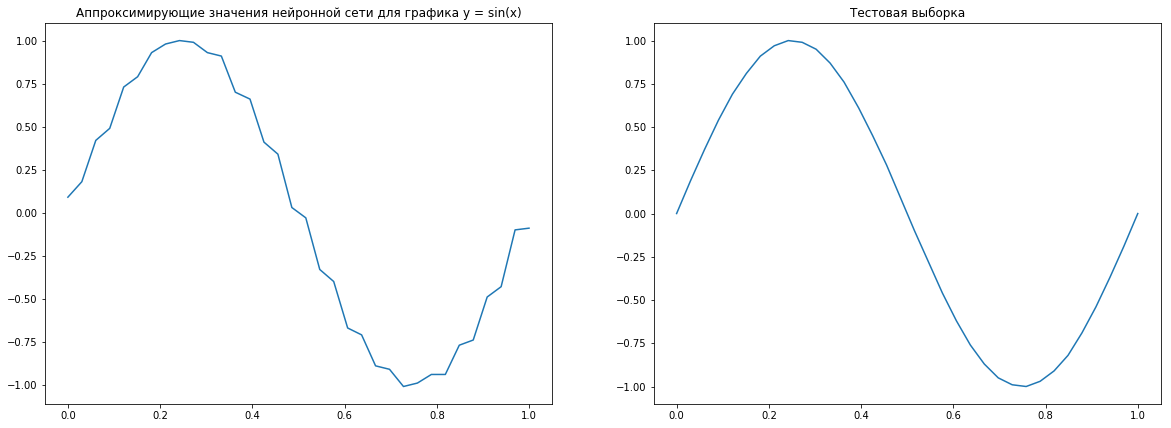

In [16]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.plot(test_x, test_prediction)
plt.title('Аппроксимирующие значения нейронной сети для графика y = sin(x)')

plt.subplot(1, 2, 2)
plt.plot(test_x, test_y)
plt.title('Тестовая выборка')

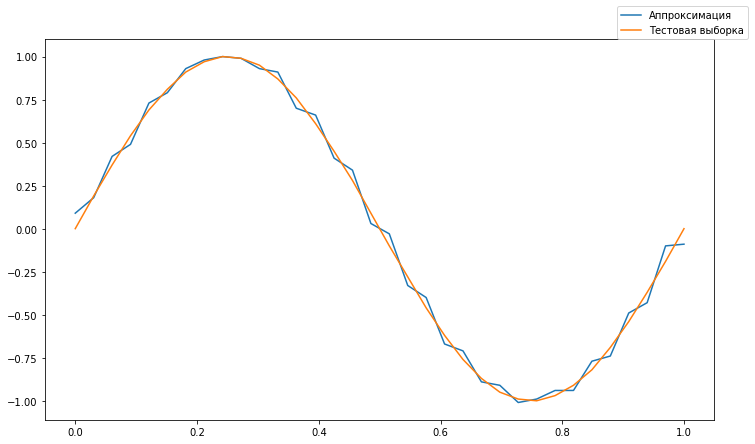

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(test_x, test_prediction, label='Аппроксимация')
plt.plot(test_x, test_y, label='Тестовая выборка')
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right', borderaxespad=0.)

На картинке выше представлены два графика функции $y = sin(x)$ 
- `Test data` - тестовая выборка
- `Prediction` - результирующая аппроксимирующая функция, полученнная с помошью нейронной сети

Качество результатов обучения напрямую зависит от фактора обобщения (generalization_factor). Эмпирическим путем было выявлено, что лучше значение, максимально соответствующее тестовой выборке - 5, худшее - 23.

<div id='neupy'/>

## Реализация CMAC в библиотеке [neupy](http://neupy.com/)

Реализация аналогичной задачи с помощью библиотеки `neupy`.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from neupy import algorithms, utils

In [19]:
X_train = np.reshape(np.linspace(0, 2 * np.pi, 100), (100, 1))
X_test = np.reshape(np.sort(2 * np.pi * np.random.random(50)), (50, 1))

y_train = np.sin(X_train)
y_test = np.sin(X_test)

In [20]:
cmac = algorithms.CMAC(
    quantization=100,
    associative_unit_size=10,
    step=0.2,
    verbose=True,
    show_epoch=100,
)


Main information

[ALGORITHM] CMAC

[OPTION] associative_unit_size = 10
[OPTION] quantization = 100
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.2
[OPTION] verbose = True



In [21]:
cmac.train(X_train, y_train, epochs=100)

#1 : [17 ms] train: 0.587329


#100 : [12 ms] train: 0.000001


In [22]:
predicted_test = cmac.predict(X_test)

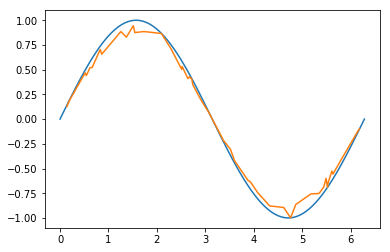

In [23]:
plt.plot(X_train, y_train)
plt.plot(X_test, predicted_test)
plt.show()

На картинке выше представлены два графика функции $y = sin(x)$ 
- `Test data` - тестовая выборка
- `Prediction` - результирующая аппроксимирующая функция, полученнная с помошью нейронной сети библиотеки neupy

На картинке заметно, что 33% тестовых данных было недостаточно для того, чтобы смоделировать достаточно точную аппроксимирующую функцию для тестовой выборки, из-за чего видно несоответствие графиков в местах максимального изменения аргументов функции (на сгибах).

<div id='analysis'/>

## Анализ таблицы метеорологических данных Австралии

Задача заполнения пропусков в метеорологических данных Австралии

Набор данных: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

- препроцессинг данных для обучения модели
- обучение модели нейронной сети CMAC
- восстановление пропусков в таблице

### Препроцессинг данных для обучения модели

In [24]:
# получаем исходные данные
australia_df = pd.read_csv("data/weatherAUS.csv")

In [25]:
australia_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Для обзора рассмотрим топ 16 самых населенных городов: Sydney, Brisbane, Perth, Wollongong, Geelong, Townsville, Cairns, Darwin, Toowoomba.

In [26]:
locations = [
    'Sydney',  'Brisbane', 'Perth', 'Wollongong', 'Darwin', 'Ballarat', 'Bendigo', 'Launceston', 
    'Witchcliffe', 'Katherine', 'Richmond', 'Tuggeranong', 'WaggaWagga', 'AliceSprings', 'Williamtown', 'Uluru'
]

# выбираем только нужные нам локации
australia_full = australia_df.loc[australia_df['Location'].isin(locations)]

Для создания таблицы будем использовать только *город*, *дату* и *темпереатуру* (среднее арифметическое максимальной и минимальной температуры)

In [27]:
australia_full = australia_full.loc[:, ['Location', 'Date', 'MinTemp', 'MaxTemp']] 
australia_full['Temperature'] = round((australia_full['MaxTemp'] + australia_full['MinTemp']) / 2, 1)

australia = australia_full.copy()
australia = australia.drop(['MinTemp', 'MaxTemp'], axis=1)

In [28]:
# получаем один список, вместо списка списков
flatten = lambda l: [item for sublist in l for item in sublist]

Для упрощения восприятия возьмем очень ограниченные набор данных, чтобы уместить его в одну таблицу.

Для обучающей выборки ограничимся промежутком одну неделю: с `01.01.2015` по `07.01.2015`, для тестовой выборки возьмем тот же интервал, но на два года позже: с `01.01.2017` по `07.01.2017`.

In [29]:
australia_2015 = australia.loc[(australia['Date'] >= '2015-01-01') & (australia['Date'] <= '2015-01-07')]
australia_2017 = australia.loc[(australia['Date'] >= '2017-01-01') & (australia['Date'] <= '2017-01-07')]

Напишем отдельную функцию для красивого вывода таблиц, с учетом пропущенных данных.

In [30]:
def print_table(australia_):
    dates = sorted(list(set(australia_['Date'])))
    pretty_table = PrettyTable([''] + dates)

    for location in locations:
        location_data = australia_.loc[australia_['Location'] == location, ['Date', 'Temperature']]
        location_temperatures = []
        for date in dates:
            location_temperature = location_data.loc[location_data['Date'] == date, ['Temperature']]
            if not location_temperature.empty:
                location_temperatures.append(location_temperature['Temperature'].iloc[0])
            else:
                location_temperatures.append('')
        pretty_table.add_row([location] + location_temperatures)

    print(pretty_table)

Выведем получившиеся таблицы с данными за 2015 и 2017 год. 

На оси абсцисс отображено **время**, на оси ординат - **города**. Значение ячеек - **температура** в градусах Цельсия.

In [31]:
print_table(australia_2015)

+--------------+------------+------------+------------+------------+------------+------------+------------+
|              | 2015-01-01 | 2015-01-02 | 2015-01-03 | 2015-01-04 | 2015-01-05 | 2015-01-06 | 2015-01-07 |
+--------------+------------+------------+------------+------------+------------+------------+------------+
|    Sydney    |    24.9    |    24.8    |    25.4    |    26.4    |    23.4    |    24.8    |    26.0    |
|   Brisbane   |    28.2    |    27.6    |    26.8    |    25.6    |    25.0    |    25.5    |    23.8    |
|    Perth     |    23.0    |    20.9    |    22.6    |    25.5    |    33.8    |    27.8    |    27.0    |
|  Wollongong  |    22.2    |    22.6    |    23.1    |    23.4    |    21.3    |    22.5    |    23.8    |
|    Darwin    |    25.3    |    26.6    |    27.2    |    26.9    |    28.1    |    28.6    |    28.7    |
|   Ballarat   |    17.3    |    24.9    |    30.6    |    18.0    |    18.2    |    21.8    |    25.8    |
|   Bendigo    |    21.0    

In [32]:
print_table(australia_2017)

+--------------+------------+------------+------------+------------+------------+------------+------------+
|              | 2017-01-01 | 2017-01-02 | 2017-01-03 | 2017-01-04 | 2017-01-05 | 2017-01-06 | 2017-01-07 |
+--------------+------------+------------+------------+------------+------------+------------+------------+
|    Sydney    |    24.6    |    23.8    |    22.6    |    23.0    |    22.0    |    23.2    |    23.0    |
|   Brisbane   |    29.8    |    29.3    |    24.6    |    26.0    |    25.4    |    24.8    |    25.1    |
|    Perth     |    23.8    |    27.6    |    29.1    |    29.9    |    22.4    |    20.0    |    19.4    |
|  Wollongong  |    22.5    |    21.4    |    20.0    |    21.6    |    21.0    |    22.5    |    22.2    |
|    Darwin    |    27.4    |    27.0    |    26.8    |    28.5    |    28.8    |    28.6    |    30.0    |
|   Ballarat   |    16.4    |    15.1    |    16.8    |    21.4    |    24.5    |    25.3    |    25.9    |
|   Bendigo    |    20.3    

Представим, что данные за 2017 год частично были потеряны и произвольно удалим 33% значений в таблице.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    australia_2017[['Location', 'Date']],
    australia_2017[['Temperature']],
    test_size=0.33
)

Выведем получившуюся таблицу с пропущенными данными.

In [34]:
print_table(x_train.join(y_train))

+--------------+------------+------------+------------+------------+------------+------------+------------+
|              | 2017-01-01 | 2017-01-02 | 2017-01-03 | 2017-01-04 | 2017-01-05 | 2017-01-06 | 2017-01-07 |
+--------------+------------+------------+------------+------------+------------+------------+------------+
|    Sydney    |            |            |    22.6    |            |            |    23.2    |    23.0    |
|   Brisbane   |            |            |    24.6    |            |            |    24.8    |    25.1    |
|    Perth     |    23.8    |            |    29.1    |    29.9    |            |            |    19.4    |
|  Wollongong  |    22.5    |    21.4    |    20.0    |            |    21.0    |    22.5    |    22.2    |
|    Darwin    |    27.4    |    27.0    |    26.8    |            |            |            |            |
|   Ballarat   |    16.4    |    15.1    |            |    21.4    |    24.5    |    25.3    |            |
|   Bendigo    |    20.3    

Преобразуем все строковые значения (колонки *Location* и *Date*) в числовые для того, чтобы удовлетворить требоания сети CMAC.

In [35]:
australia_2015.head()

,Location,Date,Temperature
28593,Richmond,2015-01-01,26.4
28594,Richmond,2015-01-02,27.0
28595,Richmond,2015-01-03,27.8
28596,Richmond,2015-01-04,28.3
28597,Richmond,2015-01-05,23.8


In [36]:
# зменяем все строковые даты на числа дня, e.g.: 2017-01-03 -> 3
dates = australia_2015.append(australia_2017)['Date'].unique()
date_replace = {date: int(date.split('-')[2]) for date in dates}

# заменяем все локации их индексами в массиве 
location_replace = {location: index for index, location in enumerate(locations)}

In [37]:
australia_2015['Date'].replace(date_replace, inplace=True)
australia_2015['Location'].replace(location_replace, inplace=True)

In [38]:
australia_2015.head()

,Location,Date,Temperature
28593,10,1,26.4
28594,10,2,27.0
28595,10,3,27.8
28596,10,4,28.3
28597,10,5,23.8


На данном этапе все данные подготовлены и можно приступить к обучению модели.

### Обучение модели нейронной сети CMAC

In [39]:
# создаем CMAC объект для обучения
cmac_australia = algorithms.CMAC(quantization=100,associative_unit_size=32,step=0.2)

In [40]:
# обучаем модель на данных 2015 года
cmac_australia.train(australia_2015[['Location', 'Date']], australia_2015[['Temperature']], epochs=100)

### Восстановление пропусков в таблице

Сделаем соответствующие замены для даты и места в тестовой выборке.

In [41]:
x_test['Date'].replace(date_replace, inplace=True)
x_test['Location'].replace(location_replace, inplace=True)

Выполним предсказание для тестовой выборки, исходя из параметров обученной модели.

In [42]:
predicted_test = cmac_australia.predict(x_test)

Выполним аналогичные обратные преобразования для даты и места.

In [43]:
date_replace_reverse = {value: key for key, value in date_replace.items()}
location_replace_reverse = {value: key for key, value in location_replace.items()}

In [44]:
x_test['Date'].replace(date_replace_reverse, inplace=True)
x_test['Location'].replace(location_replace_reverse, inplace=True)

In [45]:
predicted_test = pd.DataFrame({'Temperature': flatten(predicted_test)}, index=x_test.index)

Объеденим обучающую и тестовоую выборки.

In [46]:
train = x_train.join(y_train)
test = x_test.join(predicted_test)

Получим окончательный результат, представив таблицу с пропусками (объединение аргументов и значений обучающей выборки) и заполненную таблицу (объединение обучающейся и полученной тестовой выборки).

In [47]:
print_table(train)

+--------------+------------+------------+------------+------------+------------+------------+------------+
|              | 2017-01-01 | 2017-01-02 | 2017-01-03 | 2017-01-04 | 2017-01-05 | 2017-01-06 | 2017-01-07 |
+--------------+------------+------------+------------+------------+------------+------------+------------+
|    Sydney    |            |            |    22.6    |            |            |    23.2    |    23.0    |
|   Brisbane   |            |            |    24.6    |            |            |    24.8    |    25.1    |
|    Perth     |    23.8    |            |    29.1    |    29.9    |            |            |    19.4    |
|  Wollongong  |    22.5    |    21.4    |    20.0    |            |    21.0    |    22.5    |    22.2    |
|    Darwin    |    27.4    |    27.0    |    26.8    |            |            |            |            |
|   Ballarat   |    16.4    |    15.1    |            |    21.4    |    24.5    |    25.3    |            |
|   Bendigo    |    20.3    

In [48]:
print_table(train.append(test).round(1))

+--------------+------------+------------+------------+------------+------------+------------+------------+
|              | 2017-01-01 | 2017-01-02 | 2017-01-03 | 2017-01-04 | 2017-01-05 | 2017-01-06 | 2017-01-07 |
+--------------+------------+------------+------------+------------+------------+------------+------------+
|    Sydney    |    24.9    |    24.8    |    22.6    |    26.4    |    23.4    |    23.2    |    23.0    |
|   Brisbane   |    28.2    |    27.6    |    24.6    |    25.6    |    25.0    |    24.8    |    25.1    |
|    Perth     |    23.8    |    20.9    |    29.1    |    29.9    |    33.8    |    27.8    |    19.4    |
|  Wollongong  |    22.5    |    21.4    |    20.0    |    23.4    |    21.0    |    22.5    |    22.2    |
|    Darwin    |    27.4    |    27.0    |    26.8    |    26.9    |    28.1    |    28.6    |    28.7    |
|   Ballarat   |    16.4    |    15.1    |    30.6    |    21.4    |    24.5    |    25.3    |    25.8    |
|   Bendigo    |    20.3    

## Источники

- *Аведьян Э.Д., Луганский В.Э.* Подход к задаче заполнения числовых пропусков в таблицах и строках, основанный на многослойной нейронной сети и нейронной сети СМАС // Информационные технологии, 2014. No. 1., C. 58 – 66


- *Аведьян Э.Д., Луганский В.Э.* Способы повышения точности заполнения числовых пропусков в таблицах, основанные на модифицированных нейронных сетях СМАС // Информационные технологии. 2014. No.5. С. 58 - 65